In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import warnings
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

# Data 
data = {
    "Year": [1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012],
    "Time": [10.32, 10.06, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92, 9.96, 9.84, 9.87, 9.85, 9.69, 9.63]
}

df = pd.DataFrame(data)

# Scale the year 
df['x'] = (df['Year'] - 1960) / 52

# Linear model T = alpha_0 + alpha_1 * x
X_linear = sm.add_constant(df['x'])  
linear_model = sm.OLS(df['Time'], X_linear).fit()

# Params and summary
linear_params = linear_model.params
linear_summary = linear_model.summary()


print(linear_params)
print(linear_summary)


const    10.221714
x        -0.510571
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     31.52
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000114
Time:                        23:00:17   Log-Likelihood:                 12.699
No. Observations:                  14   AIC:                            -21.40
Df Residuals:                      12   BIC:                            -20.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [5]:
# Quadratic model T = beta_0 + beta_1 * x + beta_2 * x^2
X_quadratic = sm.add_constant(np.column_stack((df['x'], df['x']**2)))  # Include x and x^2 terms
quadratic_model = sm.OLS(df['Time'], X_quadratic).fit()

quadratic_params = quadratic_model.params
quadratic_summary = quadratic_model.summary()

print(quadratic_params)
print(quadratic_summary)

const    10.166893
x1       -0.154232
x2       -0.356339
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                   Time   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     16.59
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           0.000478
Time:                        22:59:16   Log-Likelihood:                 13.412
No. Observations:                  14   AIC:                            -20.82
Df Residuals:                      11   BIC:                            -18.91
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------

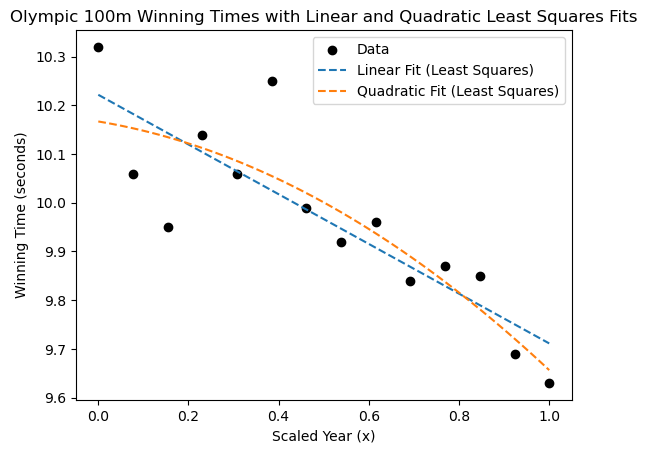

In [ ]:

# Data 
x_vals = np.linspace(df['x'].min(), df['x'].max(), 100)

# Lines of best fut 
linear_fit = linear_params['const'] + linear_params['x'] * x_vals
quadratic_fit = quadratic_params['const'] + quadratic_params['x1'] * x_vals + quadratic_params['x2'] * x_vals**2

# Plot data points 
plt.scatter(df['x'], df['Time'], color='black', label='Data')

# Linear fit line
plt.plot(x_vals, linear_fit, label='Linear Fit (Least Squares)', linestyle='--')

# Quadratic fit line
plt.plot(x_vals, quadratic_fit, label='Quadratic Fit (Least Squares)', linestyle='--')

# Labels and legend
plt.xlabel("Scaled Year (x)")
plt.ylabel("Winning Time (seconds)")
plt.title("Olympic 100m Winning Times with Linear and Quadratic Least Squares Fits")
plt.legend()
plt.show()


In [ ]:
years_to_predict = [2020, 2024]

# Scale years
x_predict = [(year - 1960) / 52 for year in years_to_predict]

# Predict using the linear model
linear_predictions = linear_params['const'] + linear_params['x'] * np.array(x_predict)

# Predict using the quadratic model
quadratic_predictions = (
    quadratic_params['const'] + quadratic_params['x1'] * np.array(x_predict) + quadratic_params['x2'] * np.array(x_predict)**2
)

predictions = {
    "Year": years_to_predict,
    "Linear Prediction": linear_predictions,
    "Quadratic Prediction": quadratic_predictions
}

actual_times = [9.8, 9.79]  
predictions["Actual Time"] = actual_times

# Display predictions in a DataFrame
predictions_df = pd.DataFrame(predictions)
print(predictions_df)

   Year  Linear Prediction  Quadratic Prediction  Actual Time
0  2020           9.632593              9.514516         9.80
1  2024           9.593319              9.437288         9.79
